## NOTES 
#### BMI is body to weight ratio
1) BMI categories 
* Underweight: Below 18.5 
* Normal weight: 18.5 to 24.9 
* Overweight: 25 to 29.9 
* Obese: 30 or greater 
#### Diabetes Pedigree function 
In datasets related to diabetes prediction, "DiabetesPedigreeFunction" (DPF) refers to a measure of the likelihood of a person having diabetes based on their family history of the disease. It's a score that ranges from 0.08 to 2.42, with higher values suggesting a greater chance of diabetes.

## STEPS I WILL TAKE 

* Remove outliers and other null values , 
* perform EDA analysis 
* split the data into x and y 
* Handling imbalanced dataset 
* Perform Feature Scaling and Feature Selection 
* Split the data into training , testing dataset , 
* Use machine learning algorithms 
* check for overfitting
* if overfitting exists , use regularization
* check the training data once more ! 

In [287]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [288]:
df = pd.read_csv("../dataset/diabetes.csv")

In [289]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [290]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Insulin'>

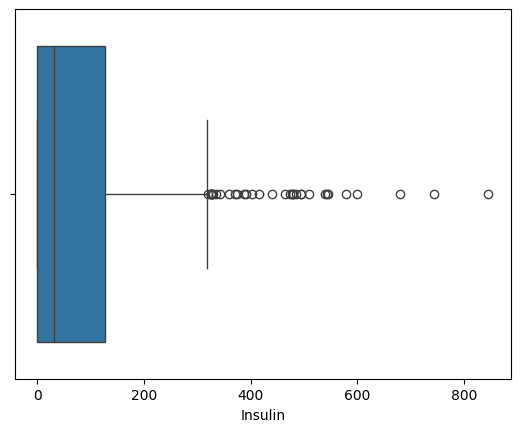

In [291]:
sns.boxplot(x="Insulin",data=df)

In [292]:
q1 = df["Insulin"].quantile(0.25)
q3 = df["Insulin"].quantile(0.75)
IQR = q3 - q1

In [293]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)

In [294]:
min_range,max_range

(-190.875, 318.125)

In [295]:
filtered_df = df[df["Insulin"]<=max_range]

In [296]:
filtered_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: xlabel='DiabetesPedigreeFunction'>

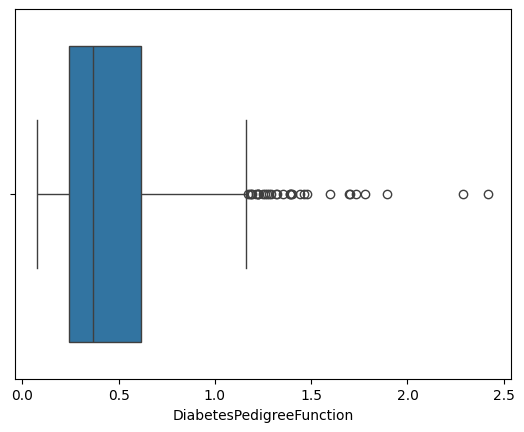

In [297]:
sns.boxplot(x="DiabetesPedigreeFunction",data=filtered_df)

In [298]:
q1 = filtered_df["DiabetesPedigreeFunction"].quantile(0.25)
q3 = filtered_df["DiabetesPedigreeFunction"].quantile(0.75)
IQR = q3 - q1

In [299]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)

In [300]:
min_range,max_range

(-0.3125000000000001, 1.1695000000000002)

In [301]:
filtered_df = filtered_df[filtered_df["DiabetesPedigreeFunction"] <= max_range]

In [302]:
filtered_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [303]:
filtered_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,3.839260,118.477952,68.827881,19.779516,61.512091,31.802276,0.423461,33.136558,0.327169
std,3.362445,30.866993,19.849798,15.933928,78.591171,7.826713,0.243751,11.755273,0.469514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.000000,0.237500,24.000000,0.000000
50%,3.000000,114.000000,72.000000,22.000000,0.000000,32.000000,0.349000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,111.000000,36.300000,0.582500,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,318.000000,67.100000,1.162000,81.000000,1.000000


<Axes: xlabel='DiabetesPedigreeFunction'>

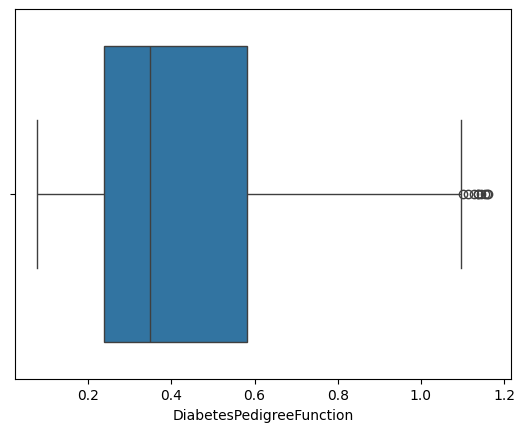

In [304]:
sns.boxplot(x="DiabetesPedigreeFunction",data=filtered_df)

In [305]:
x = filtered_df.iloc[:,:-1]
y = filtered_df["Outcome"]

In [306]:
from imblearn.under_sampling import RandomUnderSampler

In [307]:
rs = RandomUnderSampler()

In [308]:
x,y = rs.fit_resample(x,y)

In [309]:
y.value_counts()

Outcome
0    230
1    230
Name: count, dtype: int64

In [310]:
from sklearn.preprocessing import StandardScaler

In [311]:
ss = StandardScaler()

In [312]:
transformed_data_x = ss.fit_transform(x)

In [313]:
x = pd.DataFrame(transformed_data_x,columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"	,"Age"])

In [314]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.278401,-1.518660,-1.083058,-1.232811,-0.794094,0.131265,0.864831,-0.775432
1,-1.167022,-0.397132,0.522119,-0.254432,-0.794094,-0.220626,1.746538,-1.116037
2,-0.877938,-1.166180,-2.286940,-0.070986,-0.488540,-0.637683,0.484094,-1.116037
3,-0.010684,-1.070049,0.522119,-1.232811,-0.794094,1.239071,-0.806405,-0.434827
4,0.567486,-0.845743,-0.481117,-0.070986,-0.134098,-0.754980,0.235613,-0.179373
...,...,...,...,...,...,...,...,...
455,-0.877938,0.083522,0.923413,1.151989,0.550342,0.496190,2.479958,0.246383
456,-1.167022,-0.076696,0.120824,-1.232811,-0.794094,0.470124,-0.722242,1.523653
457,0.567486,2.070229,1.124060,-1.232811,-0.794094,0.365859,-0.642087,2.715771
458,1.434740,1.429356,0.221148,0.662799,-0.794094,1.473666,-0.141117,0.757291


In [315]:
y

117    0
200    0
597    0
350    0
563    0
      ..
755    1
757    1
759    1
761    1
766    1
Name: Outcome, Length: 460, dtype: int64

In [316]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

In [317]:
lr = LogisticRegression()

In [318]:
fs = SequentialFeatureSelector(lr,k_features=5,forward=True,scoring="accuracy",cv=5)

In [319]:
fs.fit(x,y)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(5, 5),
                          scoring='accuracy')

In [320]:
fs.feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [321]:
fs.k_feature_names_

('Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction')

In [322]:
list_of_selected_features = (fs.k_feature_names_)

In [323]:
fs.k_score_

0.7434782608695653

In [324]:
list_of_selected_features

('Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction')

In [325]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.278401,-1.518660,-1.083058,-1.232811,-0.794094,0.131265,0.864831,-0.775432
1,-1.167022,-0.397132,0.522119,-0.254432,-0.794094,-0.220626,1.746538,-1.116037
2,-0.877938,-1.166180,-2.286940,-0.070986,-0.488540,-0.637683,0.484094,-1.116037
3,-0.010684,-1.070049,0.522119,-1.232811,-0.794094,1.239071,-0.806405,-0.434827
4,0.567486,-0.845743,-0.481117,-0.070986,-0.134098,-0.754980,0.235613,-0.179373
...,...,...,...,...,...,...,...,...
455,-0.877938,0.083522,0.923413,1.151989,0.550342,0.496190,2.479958,0.246383
456,-1.167022,-0.076696,0.120824,-1.232811,-0.794094,0.470124,-0.722242,1.523653
457,0.567486,2.070229,1.124060,-1.232811,-0.794094,0.365859,-0.642087,2.715771
458,1.434740,1.429356,0.221148,0.662799,-0.794094,1.473666,-0.141117,0.757291


In [326]:
df_selected_x = x[list(list_of_selected_features)].copy()

In [327]:
df_selected_x.head(20)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction
0,0.278401,-1.518660,-1.083058,0.131265,0.864831
1,-1.167022,-0.397132,0.522119,-0.220626,1.746538
2,-0.877938,-1.166180,-2.286940,-0.637683,0.484094
3,-0.010684,-1.070049,0.522119,1.239071,-0.806405
4,0.567486,-0.845743,-0.481117,-0.754980,0.235613
5,-0.010684,0.371915,0.722766,-0.194560,-0.746288
6,-0.010684,0.083522,0.020501,0.209463,-0.541893
7,-0.877938,0.564177,0.221148,-0.846211,-0.730257
8,-0.010684,0.596221,-0.581440,-0.416122,-0.606017
9,-0.588853,-1.742965,0.020501,-0.611617,0.592303


In [328]:
y.shape

(460,)

In [329]:
x.shape

(460, 8)

In [330]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_selected_x,y,random_state=42,test_size=0.2)

In [331]:
x_train

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction
455,-0.877938,0.083522,0.923413,0.496190,2.479958
57,-1.167022,-0.973918,-0.280470,1.551864,-0.289404
155,-0.588853,-0.108739,0.321471,0.417991,0.179504
290,2.012909,0.307828,-3.490823,2.555406,0.560241
24,-1.167022,-1.005962,0.020501,1.408501,-0.365551
...,...,...,...,...,...
106,-0.299768,-0.845743,-0.782087,-0.924409,-1.139049
270,-0.877938,-0.268958,0.923413,0.235529,-0.141117
348,-0.877938,2.262491,0.321471,0.496190,1.750546
435,-0.299768,1.397312,0.221148,-0.363989,-0.682164


In [332]:
lr.fit(x_train,y_train)

LogisticRegression()

In [333]:
lr.score(x_test,y_test)

0.7717391304347826

In [334]:
lr.score(x_train,y_train)

0.7472826086956522

In [339]:
input_data = [[-0.897662, 0.13004, 0.910041, 0.465966, 2.547379]]

In [340]:
prediction = lr.predict(input_data)
prediction

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [341]:
from mlxtend.plotting import plot_decision_regions


In [342]:
df_selected_x

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction
0,0.278401,-1.518660,-1.083058,0.131265,0.864831
1,-1.167022,-0.397132,0.522119,-0.220626,1.746538
2,-0.877938,-1.166180,-2.286940,-0.637683,0.484094
3,-0.010684,-1.070049,0.522119,1.239071,-0.806405
4,0.567486,-0.845743,-0.481117,-0.754980,0.235613
...,...,...,...,...,...
455,-0.877938,0.083522,0.923413,0.496190,2.479958
456,-1.167022,-0.076696,0.120824,0.470124,-0.722242
457,0.567486,2.070229,1.124060,0.365859,-0.642087
458,1.434740,1.429356,0.221148,1.473666,-0.141117


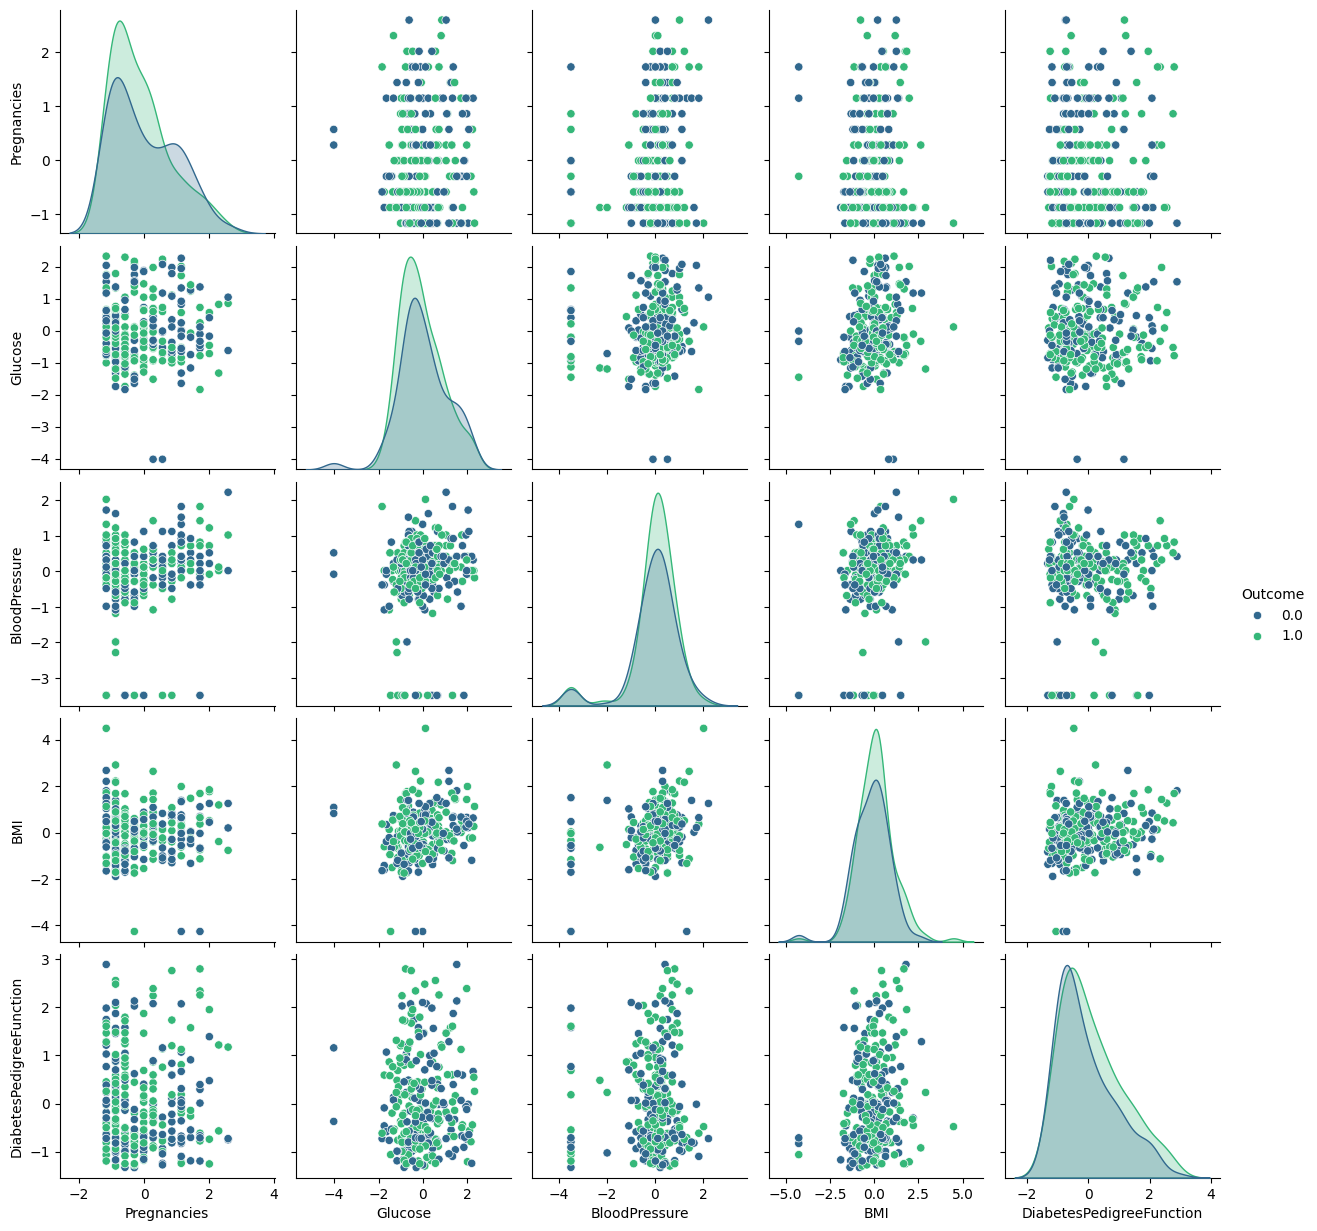

In [343]:
sns.pairplot(
    data=pd.concat([df_selected_x[list(list_of_selected_features)], y], axis=1),
    hue='Outcome',  # Target column name
    palette='viridis'
)